In [ ]:
# importing pandas and opening the exxcel file. 
# The sheet_name argument is used to select particular sheets in the file.
import pandas as pd
#reading the file
df = pd.read_excel(r"C:\Users\USER\Desktop\work\shark.xlsx",sheet_name = "Shark Tank US dataset")
# creating the dataframe called Sharkt.
Sharkt = pd.DataFrame(df)


In [51]:
# Getting basic info on the columns, I dod this to see what columns exist and if they are in the right data type.
Sharkt.info()
# to get a view of the first few rows of the dataframe
Sharkt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Season Number                       1267 non-null   int64         
 1   Season Start                        1267 non-null   datetime64[ns]
 2   Season End                          1267 non-null   datetime64[ns]
 3   Episode Number                      1267 non-null   int64         
 4   Pitch Number                        1267 non-null   int64         
 5   Original Air Date                   1267 non-null   datetime64[ns]
 6   Startup Name                        1267 non-null   object        
 7   Industry                            1267 non-null   object        
 8   Pitchers Gender                     1267 non-null   object        
 9   Company Website                     1267 non-null   object        
 10  Multiple Entrepreneurs  

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Company Website,...,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Episode Name,Release month,Release year
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,http://www.avatheelephant.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,http://whybake.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009
2,1,2009-08-09,2010-02-05,1,3,2009-08-09,Wispots,Business Services,Male,http://www.wispots.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009
3,1,2009-08-09,2010-02-05,1,4,2009-08-09,CollegeFoxesPackingBoxes,Lifestyle/Home,Male,http://collegehunkshaulingjunk.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009
4,1,2009-08-09,2010-02-05,1,5,2009-08-09,IonicEar,Software/Tech,Male,No website,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009


In [ ]:
# Now we check for missing values
print(Sharkt.isna().sum())
# the pitchers city, pitchers state, Guest name and pitchers average age columns have more than half thier values missing
# and are independent so they can't be deduced.
Sharkt = Sharkt.drop(['Pitchers City','Pitchers State','Pitchers Average Age','Guest Name'], axis = 1)



In [ ]:
# Changing values in got deal column from 0 and 1
Sharkt["Got Deal"] = Sharkt["Got Deal"].replace(0,"NO")

Sharkt["Got Deal"] = Sharkt["Got Deal"].replace(1,"YES")



In [ ]:
# In the dataset when a company has no website it is left blank so we fill blanks with no website
Sharkt["Company Website"] = Sharkt["Company Website"].fillna("No website")




In [ ]:
# In the dataset when a company was not invested in it is left blank so we fill blanks with did not invest
Sharkt[["Total Deal Amount","Total Deal Equity","Deal Valuation","Number of sharks in deal","Investment Amount Per Shark","Equity Per Shark"]] = Sharkt[["Total Deal Amount","Total Deal Equity","Deal Valuation","Number of sharks in deal","Investment Amount Per Shark","Equity Per Shark"]].fillna("Did not invest")
Sharkt[["Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity","Mark Cuban Investment Amount","Mark Cuban Investment Equity","Lori Greiner Investment Amount","Lori Greiner Investment Equity","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity","Daymond John Investment Amount","Daymond John Investment Equity","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity","Guest Investment Amount","Guest Investment Equity"]] = Sharkt[["Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity","Mark Cuban Investment Amount","Mark Cuban Investment Equity","Lori Greiner Investment Amount","Lori Greiner Investment Equity","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity","Daymond John Investment Amount","Daymond John Investment Equity","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity","Guest Investment Amount","Guest Investment Equity"]].fillna("Did not Invest")




In [ ]:
# Changing values from 0 to 1 with 1 meaning its a royalty deal and 0 meaniing advisory deal
Sharkt["Royalty Deal"] = Sharkt["Royalty Deal"].replace(1,"Royalty deal")
Sharkt["Royalty Deal"] = Sharkt["Royalty Deal"].fillna("Advisory deal")



In [ ]:
# If no loan was taken it is left empty

Sharkt["Loan"] = Sharkt["Loan"].fillna("No loan")





In [ ]:
# Changing the values for presence of sharks from 0 and 1 to present and not
Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].fillna("unknown")

Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].replace(0,"Not present")
Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].replace(1,"Present")


In [ ]:
from IPython.display import display
display(Sharkt)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Answering the questions
# Average no of episodes per season.
print(Sharkt.groupby('Season Number')["Episode Name"].nunique().mean())

In [ ]:
Sharkt['Episode Name'] = 's' + Sharkt['Season Number'].astype(str) + 'ep' + Sharkt['Episode Number'].astype(str)

In [ ]:
print(Sharkt['Episode Name'])

In [ ]:
Sharkt['Release month'] = Sharkt["Original Air Date"].dt.strftime('%b')

In [ ]:
print(Sharkt['Release month'])

In [ ]:
# How many episodes per season
import matplotlib.pyplot as plt

In [ ]:
unique_episodes_per_season = Sharkt.groupby('Season Number')['Episode Name'].nunique()
print(unique_episodes_per_season)
ep_per_season_labels = list(unique_episodes_per_season)

In [ ]:
unique_episodes_per_season.plot(kind = 'bar',color='brown')
for season, label in enumerate(ep_per_season_labels):
    plt.text(season, ep_per_season_labels[season], label, ha='center', va = "bottom")
plt.title("NO OF EPISODES PER SEASON",fontweight='bold',color='brown')
plt.xlabel('Season number')
plt.ylabel('No of episodes')

In [ ]:
# next we find the episode with thee most views

In [ ]:
max_views = Sharkt.loc[Sharkt['US Viewership'].idxmax()]['US Viewership']
max_views_episode = Sharkt.loc[Sharkt['US Viewership'].idxmax()]['Episode Name']
print('The episode with the most views is: ' + max_views_episode.upper() + ' with ' + str(max_views) + ' million views')

In [ ]:
# next we find the season with the most views

In [ ]:
# creates a dataframe with only unique episode values and the corresponding views.
Sharkt_unique_episodes = Sharkt.drop_duplicates(subset = "Episode Name")
max_seasonal_views = Sharkt_unique_episodes.groupby('Season Number')['US Viewership'].sum()
print(max_seasonal_views)
print(max_seasonal_views.loc[max_seasonal_views== max_seasonal_views.max()])

In [ ]:
# Line chart monitoring number of views by year

In [ ]:
Sharkt['Release year'] = Sharkt['Original Air Date'].dt.strftime('%Y')

In [ ]:
print(Sharkt['Release year'])

In [ ]:
unique_sharkt = Sharkt.drop_duplicates(subset = 'Episode Name')

In [ ]:
print(unique_sharkt)

In [ ]:
Views_by_time = unique_sharkt.groupby('Release year')['US Viewership'].sum()
views_per_year_labels = list(Views_by_time) 
print(Views_by_time)

In [ ]:
Views_by_time.plot(kind = 'line', color ='brown',marker ='o',alpha = 0.7)
 
plt.ylabel("No of views in million")
plt.title("No of views yearly",fontweight='bold')
plt.grid(True)
for i, labelz in enumerate(views_per_year_labels):
    x = i  # Use the index for x-coordinate
    y = Views_by_time[i]   # Use the 'Y' column for y-coordinate
    plt.text(x, y, labelz, ha='left', va='bottom',color='red',fontweight='bold')
plt.figure(figsize=(20, 10))
plt.show()

In [87]:
#pitcher gender distribution
gender_split = Sharkt.groupby('Pitchers Gender')['Pitchers Gender'].count()
gender_split_labels = list(gender_split)
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

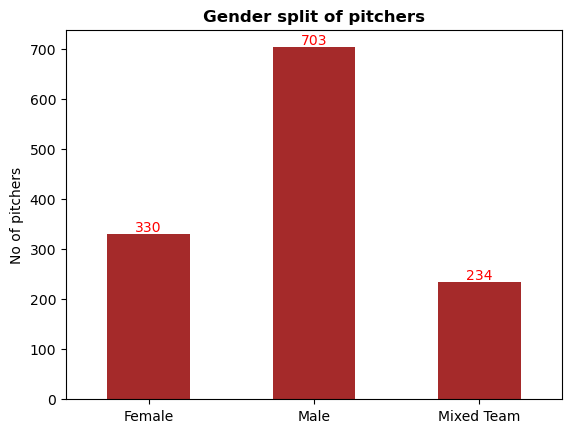

<Figure size 800x600 with 0 Axes>

In [145]:
#job industry distribution
gend = gender_split.plot(kind='bar',color='brown')
plt.title("Gender split of pitchers",fontweight='bold')
plt.ylabel("No of pitchers")
for i,v in enumerate(gender_split):
    plt.text(i,v,str(v),ha='center',va='bottom',color='red')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.figure(figsize = (8,6))

In [175]:
# TOP 5 JOB INDUSTRY
top_5_industries = Sharkt["Industry"].value_counts().nlargest(5)

In [176]:
print(top_5_industries)

Food and Beverage          274
Lifestyle/Home             225
Fashion/Beauty             217
Children/Education         117
Fitness/Sports/Outdoors    113
Name: Industry, dtype: int64


(-1.101061654256188,
 1.1010333164629922,
 -1.1015376188334232,
 1.1104677059480466)

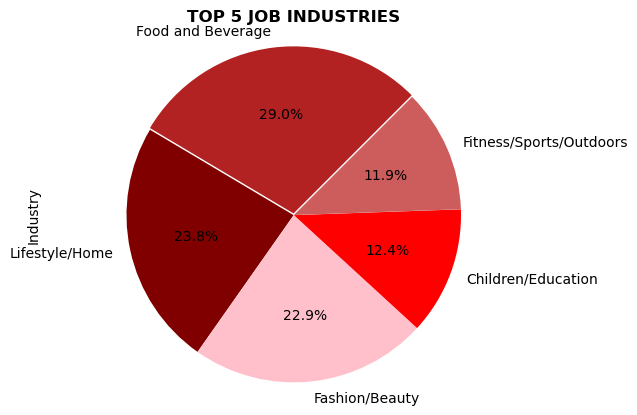

In [177]:
colors = ["firebrick","maroon","pink","red","indianred"]
explode = [0.01,0.001,0.001,0.001,0.001]
labels = ["Food and Beverage","Lifestyle/Home","Fashion/Beauty","Children/Education","Fitness/Sports/Outdoors"]
pie = top_5_industries.plot(kind='pie',colors=colors,autopct = "%1.1f%%",startangle=45,explode=explode,legend=False,labels=labels)
pie.legend().set_visible(False)
plt.title("TOP 5 JOB INDUSTRIES",fontweight='bold')
plt.axis('equal')

In [205]:
Sharkt.loc[(Sharkt['Industry']=='Food and Beverage' or 'Lifestyle/Home' or 'Fashion/Beauty' or 'Children/Education' or 'Fitness/Sports/Outdoors'),['Industry','Pitchers Gender']]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [190]:
f.head()

,Industry
Food and Beverage,274
Lifestyle/Home,225
Fashion/Beauty,217
Children/Education,117
Fitness/Sports/Outdoors,113
